# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [1]:
from keras.datasets import fashion_mnist  # импорт исходного датасета
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np
from keras.optimizers import Adam
from keras.utils import to_categorical


## 1.2. Разделяем данные на обучающую и тестовую выборку

In [ ]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

# Нормализуем
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255

trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)


Train: X =  (60000, 28, 28, 1)
Test: X =  (10000, 28, 28, 1)


## 1.3. Визуализируем часть данных из датасета

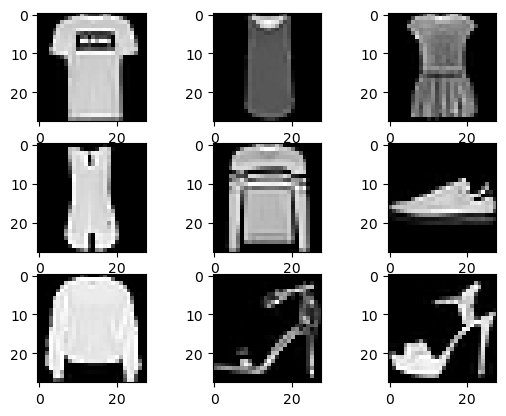

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()


## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same',
           activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 3136)              0         
                                                                 
 dense_36 (Dense)            (None, 128)             

## 1.5. Обучаем модель

In [ ]:
%time
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


his = model.fit(trainX, trainY, batch_size=256,
                epochs=50, validation_data=(testX, testY))

model.evaluate(testX, testY)


Wall time: 0 ns
Epoch 1/50
235/235 [==============================] - 3s 10ms/step - loss: 1.0034 - accuracy: 0.6965 - val_loss: 0.5979 - val_accuracy: 0.7870
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.5252 - accuracy: 0.8144 - val_loss: 0.4915 - val_accuracy: 0.8267
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.4587 - accuracy: 0.8370 - val_loss: 0.4710 - val_accuracy: 0.8290
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.4199 - accuracy: 0.8526 - val_loss: 0.4298 - val_accuracy: 0.8440
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.4003 - accuracy: 0.8586 - val_loss: 0.4119 - val_accuracy: 0.8518
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.3820 - accuracy: 0.8658 - val_loss: 0.3935 - val_accuracy: 0.8585
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3668 - accuracy: 0.8720 - val_loss: 0.3795 - val_accu

[0.263082891702652, 0.9060999751091003]

## 1.5. Анализируем обученную модель. Строим график (графики) обучения

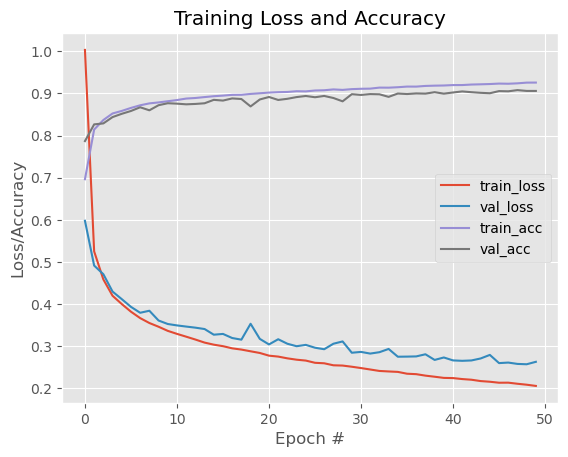

In [ ]:
%matplotlib inline
# Графики потерь и точности
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his.history["loss"], label="train_loss")
plt.plot(N, his.history["val_loss"], label="val_loss")
plt.plot(N, his.history["accuracy"], label="train_acc")
plt.plot(N, his.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


## 1.6. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [ ]:
import cv2


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


def test_predict(image_path):
    image = cv2.imread(image_path)
    output = image.copy()
    image = cv2.resize(image, (28, 28))
    image = cv2.bitwise_not(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = image.astype("float") / 255.0
    image = image.reshape(-1, 28, 28, 1)
    preds = model.predict(image)
    i = preds.argmax(axis=1)[0]
    for index, pred in enumerate(preds[0]):
        print(f"{class_names[index]}:{pred * 100:.2f}%", end="; ")
    print()
    text = "{}: {:.2f}%".format(class_names[i], preds[0][i] * 100)
    _ = cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                    (0, 0, 255), 2)
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))


1/1 [==============================] - 0s 111ms/step
T-shirt/top:0.00%; Trouser:0.00%; Pullover:0.00%; Dress:0.00%; Coat:0.00%; Sandal:0.42%; Shirt:0.00%; Sneaker:99.49%; Bag:0.04%; Ankle boot:0.05%; 


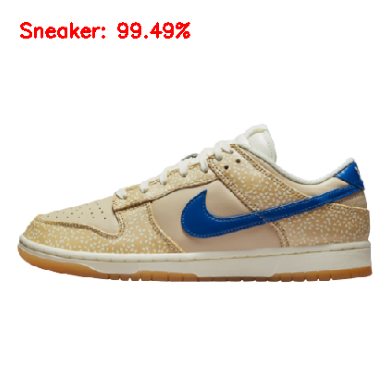

In [ ]:
# Изображение кросовок
test_predict(
    r".\test_images\fashion\fashion_test_1.png")


1/1 [==============================] - 0s 25ms/step
T-shirt/top:0.01%; Trouser:0.00%; Pullover:0.01%; Dress:0.00%; Coat:0.00%; Sandal:96.24%; Shirt:0.00%; Sneaker:3.67%; Bag:0.02%; Ankle boot:0.06%; 


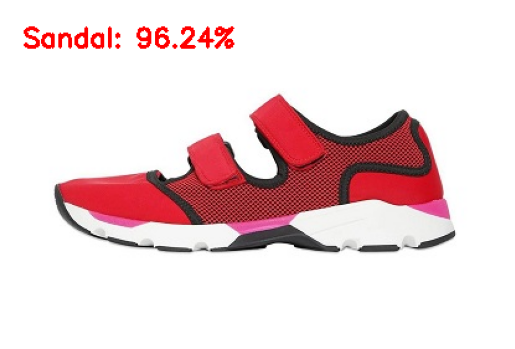

In [ ]:
# Изображение сандалей
test_predict(
    r".\test_images\fashion\fashion_test_2.jpg")


1/1 [==============================] - 0s 25ms/step
T-shirt/top:58.13%; Trouser:0.00%; Pullover:1.29%; Dress:0.01%; Coat:0.11%; Sandal:0.01%; Shirt:1.81%; Sneaker:0.00%; Bag:38.64%; Ankle boot:0.00%; 


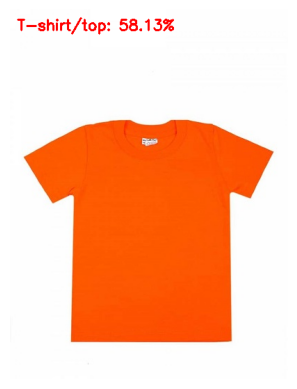

In [ ]:
# Изображение футболки
test_predict(
    r".\test_images\fashion\fashion_test_3.jpg")


1/1 [==============================] - 0s 27ms/step
T-shirt/top:1.12%; Trouser:0.09%; Pullover:8.33%; Dress:0.00%; Coat:81.84%; Sandal:0.00%; Shirt:8.45%; Sneaker:0.00%; Bag:0.17%; Ankle boot:0.00%; 


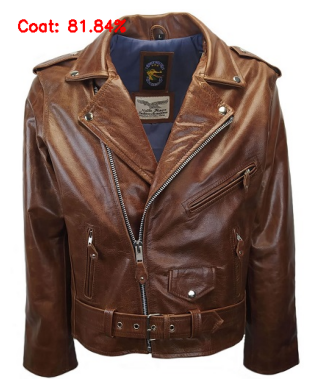

In [ ]:
# Изображение куртки
test_predict(
    r".\test_images\fashion\fashion_test_4.jpg")


1/1 [==============================] - 0s 28ms/step
T-shirt/top:0.03%; Trouser:0.00%; Pullover:0.72%; Dress:0.00%; Coat:0.03%; Sandal:0.79%; Shirt:0.00%; Sneaker:0.01%; Bag:98.42%; Ankle boot:0.00%; 


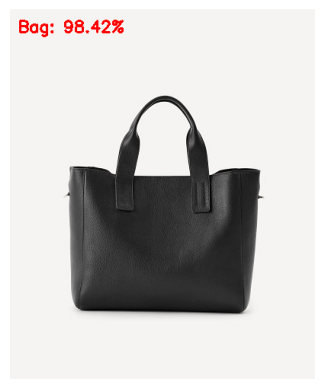

In [ ]:
# Изображение сумки
test_predict(
    r".\test_images\fashion\fashion_test_5.jpg")


1/1 [==============================] - 0s 23ms/step
T-shirt/top:19.99%; Trouser:0.61%; Pullover:0.12%; Dress:71.23%; Coat:0.04%; Sandal:0.06%; Shirt:7.83%; Sneaker:0.09%; Bag:0.03%; Ankle boot:0.00%; 


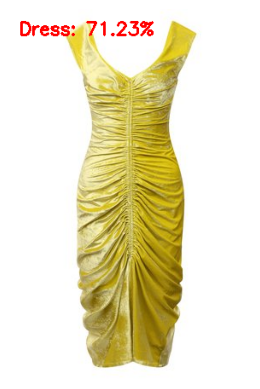

In [ ]:
# Изображение плятья
test_predict(
    r".\test_images\fashion\fashion_test_6.jpg")


## Вывод.
Как видно модели удалось верно определять 6 из 6 изображений.

# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np
from keras.utils import to_categorical
from imutils import paths
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import random
import pickle
import cv2
import os


In [2]:
# Загружаем изображения
labels = set()
imagePaths = sorted(list(paths.list_images(
    r".\data")))
random.shuffle(imagePaths)

# Извлекаем метки
for imagePath in imagePaths:
    try:
        label = imagePath.split(os.path.sep)[-2]
        labels.add(label)
    except Exception as e:
        print(str(e))

lb = LabelBinarizer()
_ = lb.fit_transform(np.array(list(labels)))


In [4]:
# Функция для подготовки данных
def prepare(imagePaths):
    allX = []
    allY = []
    for imagePath in imagePaths:
        try:
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (128, 128))
            allX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            allY.append(label)
        except Exception as e:
            print(str(e))

    # Нормализация данных
    allX = np.array(allX, dtype="float") / 255.0
    allY = np.array(allY)
    (trainX, testX, trainY, testY) = train_test_split(allX,
                                                      allY, test_size=0.25, random_state=42)

    trainY = lb.transform(trainY)
    testY = lb.transform(testY)
    return trainX, testX, trainY, testY


In [5]:
model = Sequential()
model.add(Conv2D(256, (3, 3), padding='same',
          activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3,  activation='softmax'))
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        147520    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 128)               8

In [6]:
# Получение подготовленных данных
(trainX, testX, trainY, testY) = prepare(imagePaths)


In [7]:
# Обучение
his = model.fit(trainX, trainY, batch_size=64, epochs=5,
                validation_data=(testX, testY))


Epoch 1/5
72/72 [==============================] - 16s 133ms/step - loss: 0.7538 - accuracy: 0.6612 - val_loss: 0.4879 - val_accuracy: 0.8379
Epoch 2/5
72/72 [==============================] - 9s 130ms/step - loss: 0.3663 - accuracy: 0.8628 - val_loss: 0.2580 - val_accuracy: 0.9206
Epoch 3/5
72/72 [==============================] - 10s 133ms/step - loss: 0.1992 - accuracy: 0.9353 - val_loss: 0.1689 - val_accuracy: 0.9525
Epoch 4/5
72/72 [==============================] - 10s 134ms/step - loss: 0.1318 - accuracy: 0.9594 - val_loss: 0.1177 - val_accuracy: 0.9733
Epoch 5/5
72/72 [==============================] - 10s 135ms/step - loss: 0.1055 - accuracy: 0.9670 - val_loss: 0.1168 - val_accuracy: 0.9648


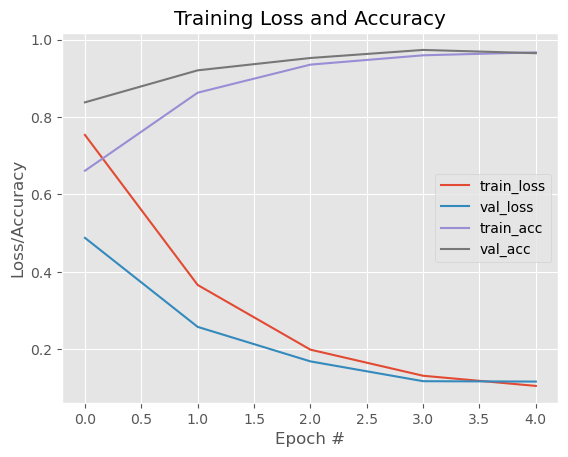

In [9]:
%matplotlib inline
# Графики потерь и точности
N = np.arange(0, 5)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his.history["loss"], label="train_loss")
plt.plot(N, his.history["val_loss"], label="val_loss")
plt.plot(N, his.history["accuracy"], label="train_acc")
plt.plot(N, his.history["val_accuracy"], label="val_acc")
plt.title(f"Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


In [10]:
# Сохраним модель
model.save(r".\roads_model_myCNN.h5",
           save_format="h5")
with open(r".\roads_label_bin_myCNN", "wb") as f:
    f.write(pickle.dumps(lb))


In [11]:
def test_image(image_path):
    # Загружаем пользовательский файл, производим предварительную обработку
    image = cv2.imread(image_path)
    output = image.copy()
    image = cv2.resize(image, (128, 128))
    image = image.astype("float") / 255.0
    image = np.expand_dims(image, axis=0)
    # По модели находим прогноз для загруженного изображения
    print(image.shape)
    preds = model.predict(image)
    for index, pred in enumerate(preds[0]):
        print(f"{lb.classes_[index]}:{pred * 100:.2f}%", end="; ")
    print()  # Выводим прогноз
    i = preds.argmax(axis=1)[0]
    label = lb.classes_[i]
    text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
    _ = cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                    (0, 0, 255), 2)
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
               )


(1, 128, 128, 3)
1/1 [==============================] - 0s 458ms/step
asphalt:0.00%; paved:99.52%; unpaved:0.48%; 


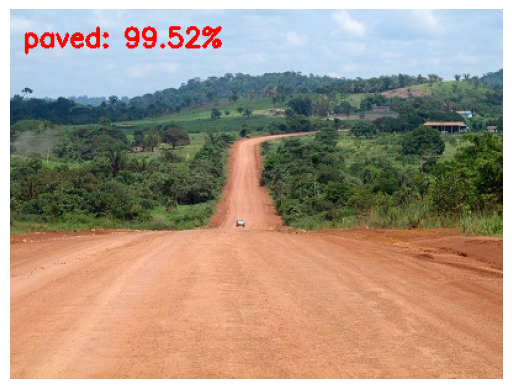

In [12]:
test_image(r".\test_images\roads\test_unpaved_1.jpg")


## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from imutils import paths
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import random
import pickle
import cv2
import os


In [ ]:
# Загружаем изображения
labels = set()
imagePaths = sorted(list(paths.list_images(
    r".\data")))
random.shuffle(imagePaths)

# Извлекаем метки
for imagePath in imagePaths:
    try:
        label = imagePath.split(os.path.sep)[-2]
        labels.add(label)
    except Exception as e:
        print(str(e))

lb = LabelBinarizer()
_ = lb.fit_transform(np.array(list(labels)))


In [ ]:
# Функция для подготовки данных
def prepare(imagePaths):
    allX = []
    allY = []
    for imagePath in imagePaths:
        try:
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (227, 227))
            allX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            allY.append(label)
        except Exception as e:
            print(str(e))

    # Нормализация данных
    allX = np.array(allX, dtype="float") / 255.0
    allY = np.array(allY)
    (trainX, testX, trainY, testY) = train_test_split(allX,
                                                      allY, test_size=0.25, random_state=42)

    trainY = lb.transform(trainY)
    testY = lb.transform(testY)
    return trainX, testX, trainY, testY


In [ ]:
# Модель AlexNet
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(
        4, 4), activation='relu', input_shape=(227, 227, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    keras.layers.Conv2D(filters=256, kernel_size=(
        5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    keras.layers.Conv2D(filters=384, kernel_size=(
        3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(
        3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(
        3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])
opt = SGD(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
# Получаем подготовленные данные
(trainX, testX, trainY, testY) = prepare(imagePaths)


In [ ]:
# Обучение модели
his = model.fit(trainX, trainY, batch_size=8, epochs=5,
                validation_data=(testX, testY))


Epoch 1/5
576/576 [==============================] - 21s 23ms/step - loss: 1.0764 - accuracy: 0.6812 - val_loss: 0.3077 - val_accuracy: 0.8763
Epoch 2/5
576/576 [==============================] - 9s 16ms/step - loss: 0.4024 - accuracy: 0.8468 - val_loss: 0.5420 - val_accuracy: 0.7507
Epoch 3/5
576/576 [==============================] - 9s 16ms/step - loss: 0.2335 - accuracy: 0.9128 - val_loss: 0.2069 - val_accuracy: 0.9251
Epoch 4/5
576/576 [==============================] - 9s 16ms/step - loss: 0.1479 - accuracy: 0.9438 - val_loss: 0.1200 - val_accuracy: 0.9551
Epoch 5/5
576/576 [==============================] - 9s 16ms/step - loss: 0.0977 - accuracy: 0.9625 - val_loss: 0.0922 - val_accuracy: 0.9661


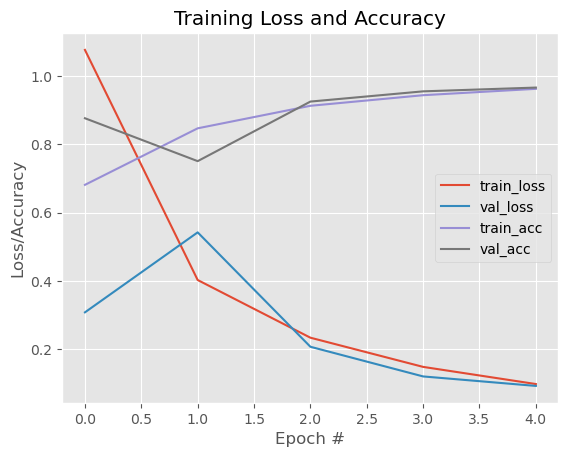

In [ ]:
%matplotlib inline
# Графики потерь и точности
N = np.arange(0, 5)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his.history["loss"], label="train_loss")
plt.plot(N, his.history["val_loss"], label="val_loss")
plt.plot(N, his.history["accuracy"], label="train_acc")
plt.plot(N, his.history["val_accuracy"], label="val_acc")
plt.title(f"Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


In [ ]:
# Сохраним модель
model.save(r".\roads_model_AlexNet.h5",
           save_format="h5")
with open(r".\roads_label_bin_AlexNet", "wb") as f:
    f.write(pickle.dumps(lb))


In [ ]:
def test_image(image_path):
    # Загружаем пользовательский файл, производим предварительную обработку
    image = cv2.imread(image_path)
    output = image.copy()
    image = cv2.resize(image, (227, 227))
    image = image.astype("float") / 255.0
    image = np.expand_dims(image, axis=0)
    # По модели находим прогноз для загруженного изображения
    preds = model.predict(image)
    for index, pred in enumerate(preds[0]):
        print(f"{lb.classes_[index]}:{pred * 100:.2f}%", end="; ")
    print()  # Выводим прогноз
    i = preds.argmax(axis=1)[0]
    label = lb.classes_[i]
    text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
    _ = cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                    (0, 0, 255), 2)
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))


1/1 [==============================] - 0s 433ms/step
asphalt:2.92%; paved:74.53%; unpaved:22.55%; 


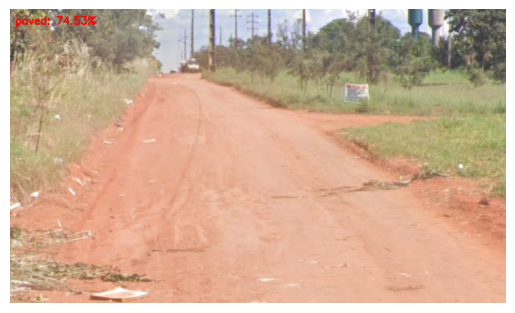

In [ ]:
test_image(r".\test_images\roads\test_unpaved_2.jpg")


## 2.3. Сохраните полученные модели

In [ ]:
# Были сохранены ранее


## 2.4. Загрузите обученную модель из прошлой практической работы


In [1]:
# Загружаем модели
from tensorflow import keras
import pickle
import matplotlib.pyplot as plt
import cv2
import numpy as np
from imutils import paths

# Модели можно скачать здесь - https://drive.google.com/drive/folders/1ZLgm-d6DScHq8aA4_yvmCkHRgE-sOnOv?usp=share_link
simpleNNModel = keras.models.load_model(
    r".\roads_model_SimpleNN.h5")
myCNNModel = keras.models.load_model(
    r".\roads_model_myCNN.h5")
alexNetModel = keras.models.load_model(
    r".\roads_model_AlexNet.h5")

lb = pickle.loads(
    open(r".\roads_label_bin", "rb").read())


In [3]:
def predict_simpleNN(image):
    image = cv2.resize(image, (32, 32))
    image = image.flatten()
    image = image.astype("float") / 255.0
    image = image.reshape((1, image.shape[0]))
    return simpleNNModel.predict(image, verbose=0)


def predict_myCNN(image):
    image = cv2.resize(image, (128, 128))
    image = image.astype("float") / 255.0
    image = np.expand_dims(image, axis=0)
    return myCNNModel.predict(image, verbose=0)


def predict_alexNet(image):
    image = cv2.resize(image, (227, 227))
    image = image.astype("float") / 255.0
    image = np.expand_dims(image, axis=0)
    return alexNetModel.predict(image, verbose=0)


In [28]:
def sprint_preds(model_name, preds, correct_answer):
    i = preds.argmax(axis=1)[0]
    prob = preds[0][i] * 100
    label = lb.classes_[i]
    out = f'{model_name} Prediction: {label}:{prob:.2f}%'
    return out, correct_answer == label

def get_image_with_prediction(output, height, prediction, correct):
    _ = cv2.putText(output, prediction, (10, height),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 3)
    if correct:
        _ = cv2.putText(output, prediction, (10, height),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (70, 125, 2), 2)
    else:
        _ = cv2.putText(output, prediction, (10, height),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    
def test_image(image_path, correct_answer):
    # Загружаем пользовательский файл, производим предварительную обработку
    image = cv2.imread(image_path)
    output = image.copy()
    simpleNNPreds = predict_simpleNN(image)
    myCNNPreds = predict_myCNN(image)
    alexNetPreds = predict_alexNet(image)

    answers = {}
    height = 30
    margin = 30
    pred, correct = sprint_preds("Simple NN", simpleNNPreds, correct_answer)
    answers["Simple NN"] = correct
    get_image_with_prediction(output, height, pred, correct)


    height += margin
    pred, correct = sprint_preds("MyCNN", myCNNPreds, correct_answer)
    answers["MyCNN"] = correct
    get_image_with_prediction(output, height, pred, correct)


    height += margin
    pred, correct = sprint_preds("AlexNet", alexNetPreds, correct_answer)
    answers["AlexNet"] = correct
    get_image_with_prediction(output, height, pred, correct)


    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    return answers



## 2.5. Сравните между собой точной всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

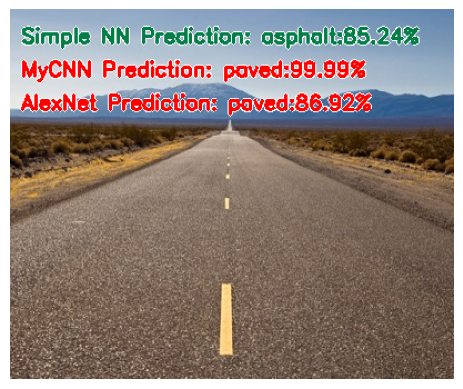

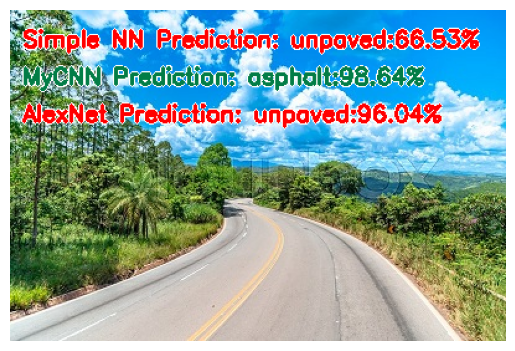

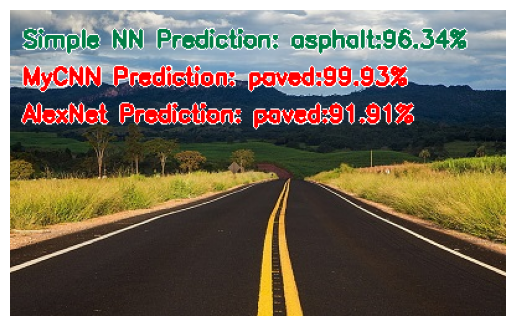

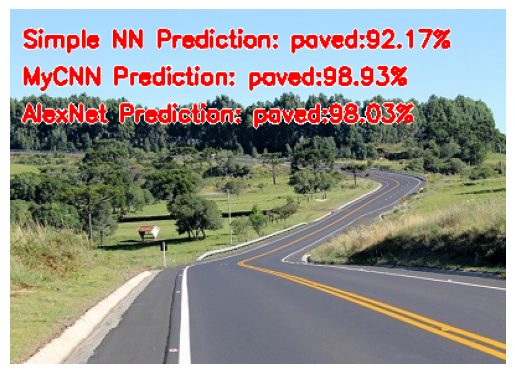

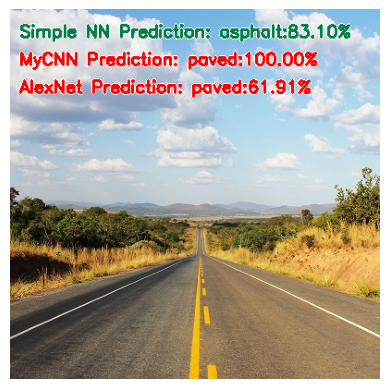

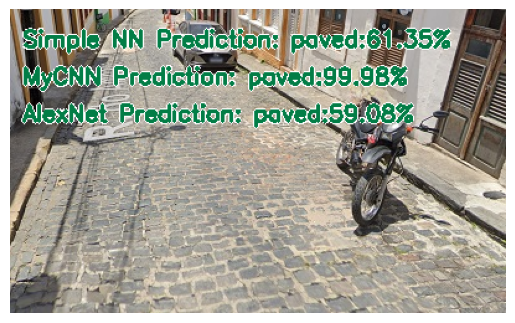

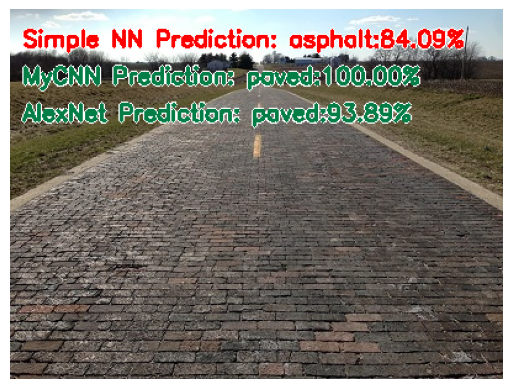

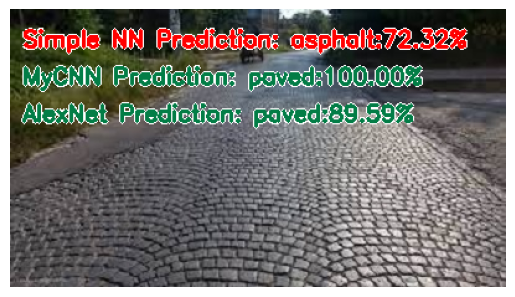

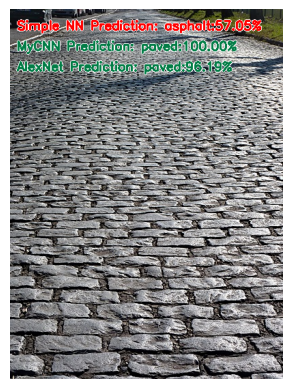

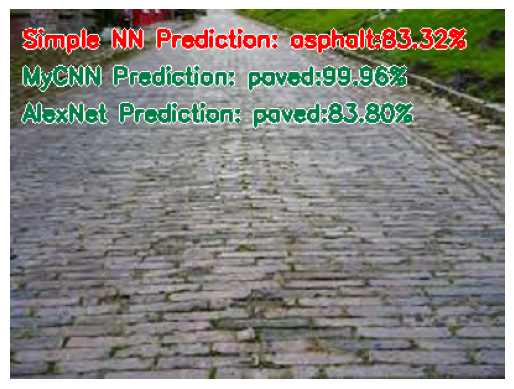

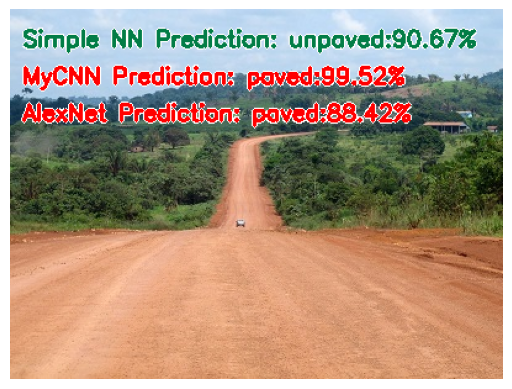

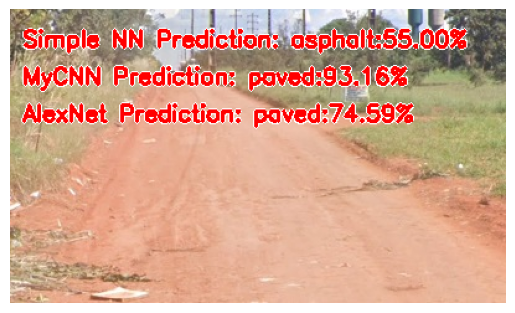

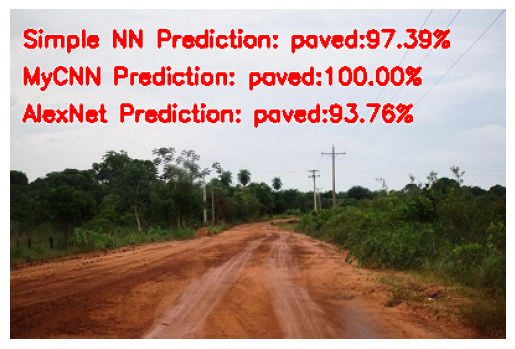

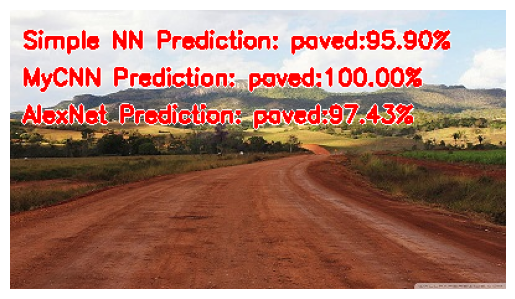

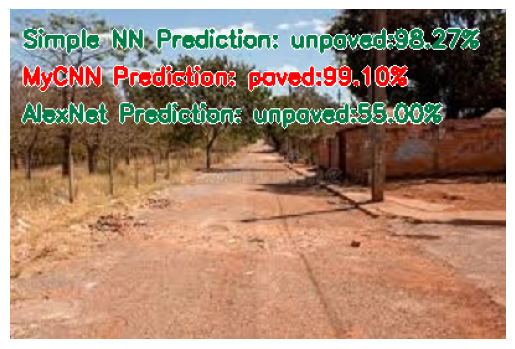

In [29]:
import pandas as pd
import os

testImages = sorted(list(paths.list_images(
    r".\test_images\roads")))

statistics = pd.DataFrame(data={
    'NN': ['Simple NN', 'MyCNN', 'AlexNet'],
    'Correct Answers': [0, 0, 0],
    'Wrong Answers': [0, 0, 0],
    'All Answers': [0, 0, 0],
})
for imagePath in testImages:
    correct_answer = os.path.basename(imagePath).split('_')[1]
    answers = test_image(imagePath, correct_answer)
    for k, v in answers.items():
        statistics.loc[statistics["NN"] == k, "All Answers"] += 1
        if v:
            statistics.loc[statistics["NN"] == k, "Correct Answers"] += 1
        else:
            statistics.loc[statistics["NN"] == k, "Wrong Answers"] += 1


In [30]:
statistics


NN  Correct Answers  Wrong Answers  All Answers
0  Simple NN                6              9           15
1      MyCNN                6              9           15
2    AlexNet                6              9           15

Все модели показали одинаковое количество правильных ответов. Точность составила 40%.

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [2]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)


In [3]:
train.shape


(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [4]:
train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape


(80, 64, 64)

### 3.1.2. Отрисуйте несколько примеров

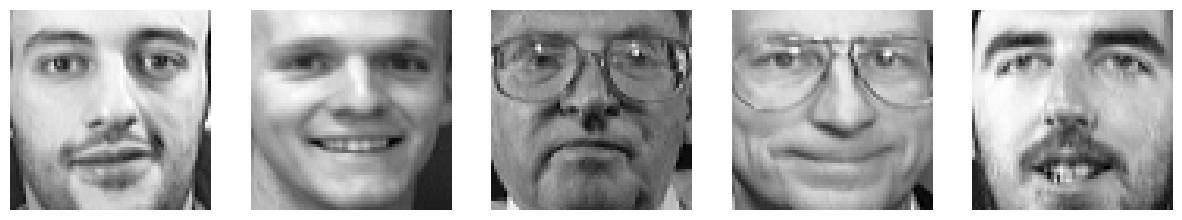

In [5]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')


Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [6]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]


In [7]:
X_train.shape


(320, 32, 64)

Вот один пример обучающей пары.

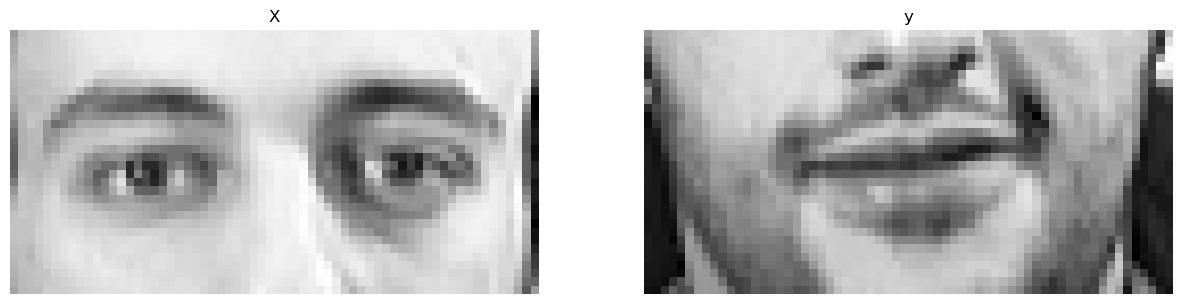

In [8]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()


### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048. 

In [9]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape


(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [51]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(256, (3, 3), padding='same',
          activation='relu', input_shape=(32, 64, 1)))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Flatten())
model.add(Dense(3072, activation='relu'))
model.add(Dense(2048,  activation='linear'))

model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 64, 256)       2560      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 16, 32, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 32, 64)        147520    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 8, 16, 64)        0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 8192)              0         
                                                                 
 dense_20 (Dense)            (None, 3072)            

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [53]:
LR = 0.001
EPOCHES = 55
opt = Adam(learning_rate=LR)
model.compile(optimizer=opt,
              loss='mse',
              metrics=['mae'])


## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [54]:
his = model.fit(X_train, y_train_n, batch_size=32,
                epochs=EPOCHES, validation_data=(X_test, y_test_n))


Epoch 1/55
10/10 [==============================] - 0s 23ms/step - loss: 0.0800 - mae: 0.2192 - val_loss: 0.0242 - val_mae: 0.1222
Epoch 2/55
10/10 [==============================] - 0s 14ms/step - loss: 0.0223 - mae: 0.1182 - val_loss: 0.0197 - val_mae: 0.1116
Epoch 3/55
10/10 [==============================] - 0s 14ms/step - loss: 0.0204 - mae: 0.1133 - val_loss: 0.0201 - val_mae: 0.1145
Epoch 4/55
10/10 [==============================] - 0s 14ms/step - loss: 0.0198 - mae: 0.1119 - val_loss: 0.0193 - val_mae: 0.1115
Epoch 5/55
10/10 [==============================] - 0s 14ms/step - loss: 0.0193 - mae: 0.1095 - val_loss: 0.0182 - val_mae: 0.1075
Epoch 6/55
10/10 [==============================] - 0s 14ms/step - loss: 0.0198 - mae: 0.1117 - val_loss: 0.0192 - val_mae: 0.1118
Epoch 7/55
10/10 [==============================] - 0s 14ms/step - loss: 0.0200 - mae: 0.1122 - val_loss: 0.0171 - val_mae: 0.1033
Epoch 8/55
10/10 [==============================] - 0s 13ms/step - loss: 0.0198 - m

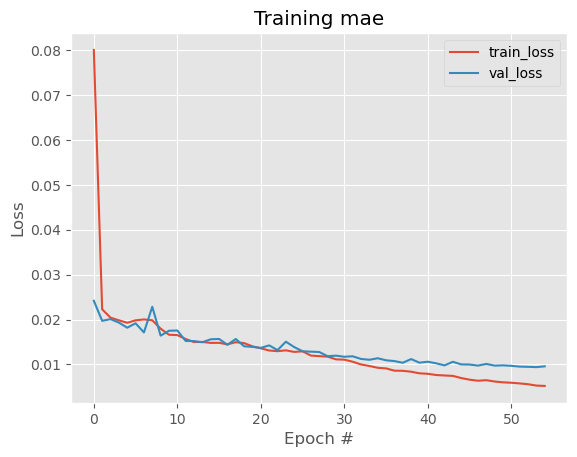

In [55]:
import numpy as np
%matplotlib inline
# Графики потерь и точности
N = np.arange(0, EPOCHES)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his.history["loss"], label="train_loss")
plt.plot(N, his.history["val_loss"], label="val_loss")
plt.title("Training mae")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
_ = plt.legend()


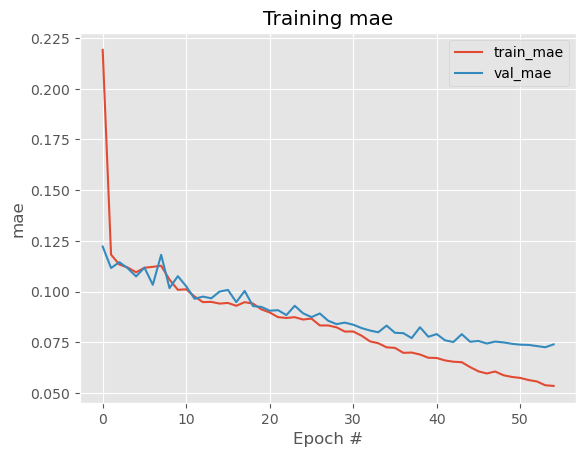

In [56]:
%matplotlib inline
# Графики потерь и точности
N = np.arange(0, EPOCHES)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his.history["mae"], label="train_mae")
plt.plot(N, his.history["val_mae"], label="val_mae")
plt.title("Training mae")
plt.xlabel("Epoch #")
plt.ylabel("mae")
_ = plt.legend()


## 3.5. Сделайте предсказания на тестовых данных

In [57]:
preds = model.predict(X_test)


3/3 [==============================] - 0s 78ms/step


## 3.6. Посчитайте метрику качества на тестовых данных

In [58]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test_n)


0.07392732

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [59]:
import numpy as np

pred_test = np.array([pred.reshape(32, 64) for pred in preds])


Отрисуйте все предсказания.

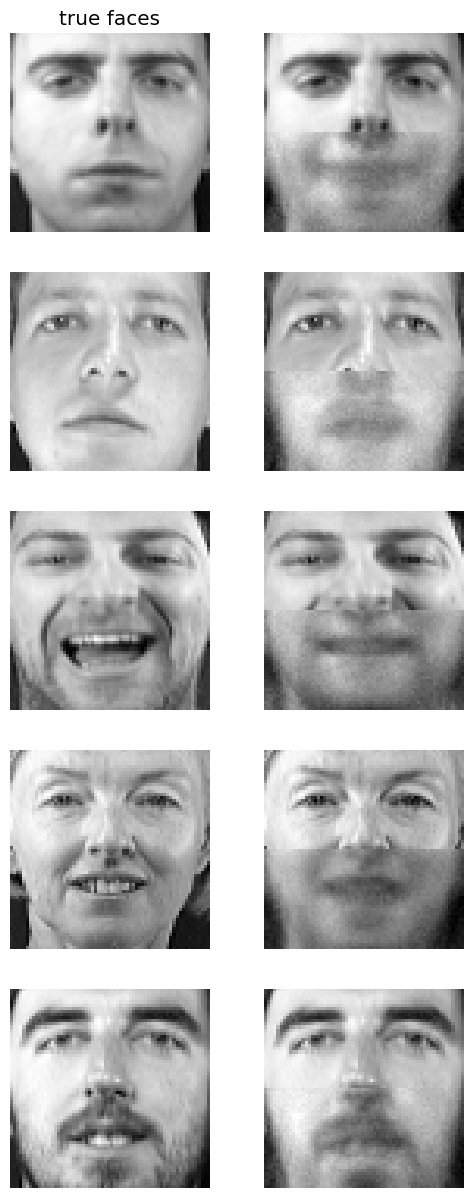

In [60]:
# Пример кода:

n_faces = 5
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )


In [61]:
# Сохрраним модель
model.save(r".\models\face_recovery_model.h5",
           save_format="h5")


### Попробуем сделать предсказания на своих данных

In [76]:
import numpy as np
import cv2
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Модель можно скачать здесь - https://drive.google.com/drive/folders/1ZLgm-d6DScHq8aA4_yvmCkHRgE-sOnOv?usp=share_link
model = keras.models.load_model(
    r".\models\face_recovery_model.h5")


In [77]:
def test_image(image_path):
    n_faces = 1
    n_cols = 2
    image_shape = (64, 64)
    plt.figure(figsize=(3 * n_cols, 3 * n_faces))

    image_shape = (64, 64)
    image = cv2.imread(image_path)
    image = cv2.resize(image, image_shape)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = image.astype("float") / 255.0
    true_face = image.copy()

    sub = plt.subplot(n_faces, n_cols, 0 * n_cols + 1, title="true face")
    sub.axis("off")
    sub.imshow(
        true_face, cmap=plt.cm.gray, interpolation="nearest"
    )

    n_pixels = image.shape[1]
    image = np.array([image])
    x = image[:, :(n_pixels + 1) // 2, :]
    preds = model.predict(x)
    pred_test = np.array([pred.reshape(32, 64) for pred in preds])
    completed_face = np.vstack((x[0], pred_test[0]))

    sub = plt.subplot(n_faces, n_cols, 0 * n_cols + 2, title="generated face")
    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )


1/1 [==============================] - 0s 43ms/step


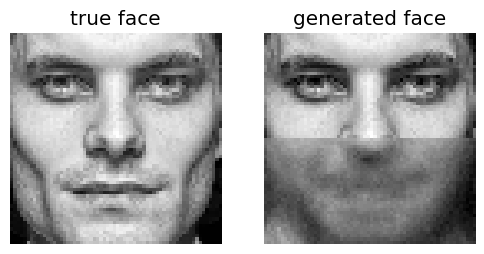

In [78]:
test_image(r".\test_images\faces\test_face_1.jpg")


1/1 [==============================] - 0s 15ms/step


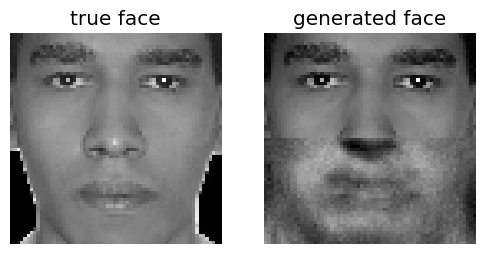

In [79]:
test_image(r".\test_images\faces\test_face_2.jpg")
